In [5]:
from mortgage import Mortgage
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [6]:
m = Mortgage(
    purchase_amount=150_000,
    percent_down=20,
    interest_rate=0.05,
    months=360,
    utility_cost_percentage=0.03,
)

In [7]:
purchase_amounts = range(150_000, 550_000, 50_000)
percents_down = [p / 100 for p in range(5, 35, 5)]
interest_rates = [r / 100 for r in range(3, 7)]
months = [180, 360]
utility_cost_percents = [.01, .02, .03, .04, .05]
variables = [purchase_amounts, percents_down, interest_rates, months, utility_cost_percents]

mortgages = [Mortgage(*scenario) for scenario in itertools.product(*variables)]
total = len(mortgages)
print(total)
columns = list(mortgages[0].to_dict().keys())
print(columns)
df = pd.DataFrame([m.to_dict() for m in mortgages], dtype='float32')
profile = ProfileReport(df, title="Mortgage Profile Report")

1920
['Rate', 'APY', 'Utility Cost', 'Month Growth', 'Payoff Years', 'Payoff Months', 'Amount', 'Monthly Payment', 'Annual Payment', 'Total Payout']


In [14]:
df[['Rate', 'Amount', 'Monthly Payment']].where(df['Monthly Payment'] < 1500)

,Rate,Amount,Monthly Payment
0,0.03,149925.0,1035.359985
1,0.03,149925.0,1035.359985
2,0.03,149925.0,1035.359985
3,0.03,149925.0,1035.359985
4,0.03,149925.0,1035.359985
...,...,...,...
1915,NaN,NaN,NaN
1916,NaN,NaN,NaN
1917,NaN,NaN,NaN
1918,NaN,NaN,NaN


<AxesSubplot: >

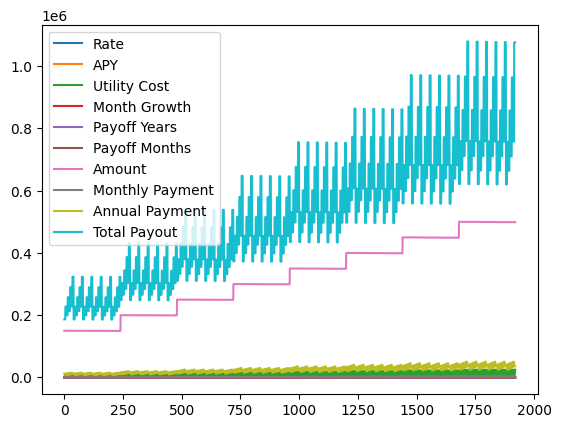

In [23]:
df.plot()